# CESM $\chi$ Relationship

This script corresponds to `Figure 7. Relationship among aerosol mixing state indices`

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gc
import seaborn as sns
import xarray as xr
#import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.colors as colors
import numpy.ma as ma
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    correlation = np.corrcoef(x, y)[0,1]
     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

%matplotlib inline

In [2]:
ds_mask=xr.open_dataset("../nc_files/f09_mask.nc")
ds_mask=ds_mask.assign_coords(lon=(((ds_mask.lon + 180) % 360) - 180))
ds_mask=ds_mask.reindex(lon=sorted(ds_mask.lon))
df = ds_mask[["chi_abd","chi_opt1","chi_hyg"]]\
.to_dataframe().dropna().reset_index()

x: chi_abd; y: chi_opt1
{'polynomial': [0.4034424478160934, 44.61902988290266], 'correlation': 0.5985815558080547, 'determination': 0.35829987895359133}
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                 7.776e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        19:14:09   Log-Likelihood:            -4.6134e+05
No. Observations:              139267   AIC:                         9.227e+05
Df Residuals:                  139265   BIC:                         9.227e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

count    139267.000000
mean         76.159851
std          12.305514
min          22.453180
25%          68.845043
50%          80.477829
75%          86.357040
max          92.977707
Name: chi_abd, dtype: float64

count    139267.000000
mean         75.345146
std           8.293886
min          48.747944
25%          69.886093
50%          76.734215
75%          81.851505
max          94.973610
Name: chi_opt1, dtype: float64

count    139267.000000
mean         64.526779
std          11.540958
min          21.201838
25%          56.087156
50%          63.066956
75%          72.881912
max          91.890503
Name: chi_hyg, dtype: float64

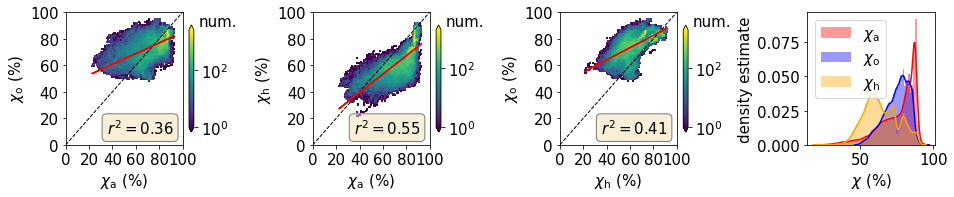

In [3]:
rc={'axes.labelsize': 15,
    'font.size': 15, 'legend.fontsize': 15, 
    'axes.titlesize': 15,
    'xtick.labelsize': 15.0,
    'ytick.labelsize': 15.0}
plt.rcParams.update(**rc)

degree=1
xedges = list(np.arange(0,100,1))
yedges = list(np.arange(0,100,1))
ticks=[0,20,40,60,80,100]

f, ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,figsize=(13.5,3))

##### ax1 #####
x=df["chi_abd"]
y=df["chi_opt1"]

H, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges))
H = H.T
H=ma.masked_where(H==0,H)
X, Y = np.meshgrid(xedges, yedges)
p1=ax1.pcolormesh(X, Y, H,
                 norm=colors.LogNorm(vmin=H.min(), vmax=H.max()))#, rasterized=True)
clb=plt.colorbar(p1,orientation='vertical',fraction=0.038,extend='both',ax=ax1)
clb.set_label('num.', labelpad=-10, y=1.1, rotation=0)
#ax1.scatter(x,y,s=0.01,rasterized=True)
ax1.plot([0,100], [0,100], 'k--', linewidth = 1)
#ax1.set_title(r"$\chi_{\rm a}$ (%)")
ax1.set_xlim(0,100)
ax1.set_xlabel(r"$\chi_{\rm a}$ (%)")
ax1.set_ylim(0,100)
ax1.set_ylabel(r"$\chi_{\rm o}$ (%)")
results = polyfit(x, y, degree)
ax1.plot(x,results['polynomial'][0]*x+results['polynomial'][1],color="red")
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
textstr = r"$r^2=%.2f$"%(results['determination'])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax1.text(0.35, 0.20, textstr, transform=ax1.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
print("x: chi_abd; y: chi_opt1")
print(results)
#https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
X = np.asarray(x)
Y = np.asarray(y)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print('The P-value is:',
      "{0:.3f}".format(est2.f_pvalue))
print("\n")

##### ax2 #####
x=df["chi_abd"]
y=df["chi_hyg"]

H, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges))
H = H.T
H=ma.masked_where(H==0,H)
X, Y = np.meshgrid(xedges, yedges)
p2=ax2.pcolormesh(X, Y, H,
                 norm=colors.LogNorm(vmin=H.min(), vmax=H.max()))#, rasterized=True)
clb=plt.colorbar(p2,orientation='vertical',fraction=0.038,extend='both',ax=ax2)
clb.set_label('num.', labelpad=-10, y=1.1, rotation=0)
#ax2.scatter(x,y,s=0.01,rasterized=True)
ax2.plot([0,100], [0,100], 'k--', linewidth = 1)
#ax2.set_title(r"$\chi_{\rm a}$ (%)")
ax2.set_xlim(0,100)
ax2.set_xlabel(r"$\chi_{\rm a}$ (%)")
ax2.set_ylim(0,100)
ax2.set_ylabel(r"$\chi_{\rm h}$ (%)")
results = polyfit(x, y, degree)
ax2.plot(x,results['polynomial'][0]*x+results['polynomial'][1],color="red")
ax2.set_xticks(ticks)
ax2.set_yticks(ticks)
textstr = r"$r^2=%.2f$"%(results['determination'])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.35, 0.20, textstr, transform=ax2.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
print("x: chi_abd; y: chi_hyg")
print(results)
X = np.asarray(x)
Y = np.asarray(y)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print('The P-value is:',
      "{0:.3f}".format(est2.f_pvalue))
print("\n")

##### ax3 #####
x=df["chi_hyg"]
y=df["chi_opt1"]

H, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges))
H = H.T
H=ma.masked_where(H==0,H)
X, Y = np.meshgrid(xedges, yedges)
p3=ax3.pcolormesh(X, Y, H,
                 norm=colors.LogNorm(vmin=H.min(), vmax=H.max()))#, rasterized=True)
clb=plt.colorbar(p3,orientation='vertical',fraction=0.038,extend='both',ax=ax3)
clb.set_label('num.', labelpad=-10, y=1.1, rotation=0)
#ax3.scatter(x,y,s=0.01,rasterized=True)
ax3.plot([0,100], [0,100], 'k--', linewidth = 1)
#ax3.set_title(r"$\chi_{\rm a}$ (%)")
ax3.set_xlim(0,100)
ax3.set_xlabel(r"$\chi_{\rm h}$ (%)")
ax3.set_ylim(0,100)
ax3.set_ylabel(r"$\chi_{\rm o}$ (%)")
results = polyfit(x, y, degree)
ax3.plot(x,results['polynomial'][0]*x+results['polynomial'][1],color="red")
ax3.set_xticks(ticks)
ax3.set_yticks(ticks)
textstr = r"$r^2=%.2f$"%(results['determination'])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax3.text(0.35, 0.20, textstr, transform=ax3.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
print("x: chi_hyg; y: chi_opt1")
print(results)
X = np.asarray(x)
Y = np.asarray(y)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())
print('The P-value is:',
      "{0:.3f}".format(est2.f_pvalue))

##### ax4 #####
color_dict={"chi_abd":"red","chi_hyg":"orange","chi_opt1":"blue"}
chi_label={"chi_abd":r"$\chi_{\rm{a}}$",
           "chi_hyg":r"$\chi_{\rm{h}}$",
           "chi_opt1":r"$\chi_{\rm{o}}$"}
for chi in ['chi_abd','chi_opt1','chi_hyg']:
    sns.distplot(df[chi],kde=True,
                 color=color_dict[chi],label=chi_label[chi],ax=ax4)
    display(df[chi].describe())
plt.legend()
ax4.set_xlabel("$\chi$ (%)")
ax4.set_ylabel("density estimate")

f.tight_layout()

plt.savefig("../../figures/cesm_chi_relationship.pdf",dpi=666)
plt.show()

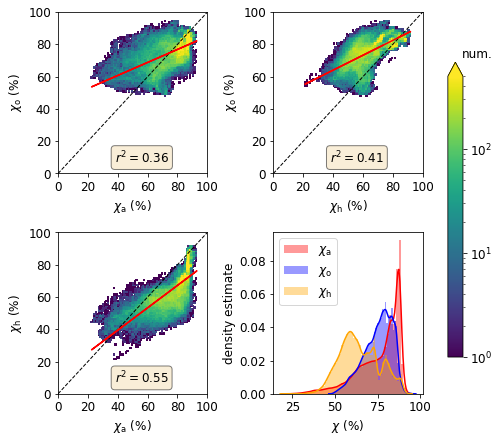

In [9]:
rc={'axes.labelsize': 12,
    'font.size': 12, 'legend.fontsize': 12, 
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12}
plt.rcParams.update(**rc)

degree=1
xedges = list(np.arange(0,100,1))
yedges = list(np.arange(0,100,1))
ticks=[0,20,40,60,80,100]

f, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2,figsize=(7,6.3))

##### ax1 #####
x=df["chi_abd"]
y=df["chi_opt1"]

H, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges))
H = H.T
H=ma.masked_where(H==0,H)
X, Y = np.meshgrid(xedges, yedges)
p1=ax1.pcolormesh(X, Y, H,
                 norm=colors.LogNorm(vmin=1, vmax=500))#, rasterized=True)
#clb=plt.colorbar(p1,orientation='vertical',fraction=0.038,extend='both',ax=ax1)
#clb.set_label('num.', labelpad=-10, y=1.1, rotation=0)
#ax1.scatter(x,y,s=0.01,rasterized=True)
ax1.plot([0,100], [0,100], 'k--', linewidth = 1)
#ax1.set_title(r"$\chi_{\rm a}$ (%)")
ax1.set_xlim(0,100)
ax1.set_xlabel(r"$\chi_{\rm a}$ (%)")
ax1.set_ylim(0,100)
ax1.set_ylabel(r"$\chi_{\rm o}$ (%)")
results = polyfit(x, y, degree)
ax1.plot(x,results['polynomial'][0]*x+results['polynomial'][1],color="red")
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
textstr = r"$r^2=%.2f$"%(results['determination'])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax1.text(0.38, 0.15, textstr, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
# print("x: chi_abd; y: chi_opt1")
# print(results)
#https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
X = np.asarray(x)
Y = np.asarray(y)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
#print(est2.summary())
# print('The P-value is:',
#       "{0:.3f}".format(est2.f_pvalue))
# print("\n")

##### ax2 #####
x=df["chi_abd"]
y=df["chi_hyg"]

H, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges))
H = H.T
H=ma.masked_where(H==0,H)
X, Y = np.meshgrid(xedges, yedges)
p2=ax2.pcolormesh(X, Y, H,
                 norm=colors.LogNorm(vmin=1, vmax=500))#, rasterized=True)
#clb=plt.colorbar(p2,orientation='vertical',fraction=0.038,extend='both',ax=ax2)
#clb.set_label('num.', labelpad=-10, y=1.1, rotation=0)
#ax2.scatter(x,y,s=0.01,rasterized=True)
ax2.plot([0,100], [0,100], 'k--', linewidth = 1)
#ax2.set_title(r"$\chi_{\rm a}$ (%)")
ax2.set_xlim(0,100)
ax2.set_xlabel(r"$\chi_{\rm a}$ (%)")
ax2.set_ylim(0,100)
ax2.set_ylabel(r"$\chi_{\rm h}$ (%)")
results = polyfit(x, y, degree)
ax2.plot(x,results['polynomial'][0]*x+results['polynomial'][1],color="red")
ax2.set_xticks(ticks)
ax2.set_yticks(ticks)
textstr = r"$r^2=%.2f$"%(results['determination'])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax2.text(0.38, 0.15, textstr, transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
# print("x: chi_abd; y: chi_hyg")
# print(results)
X = np.asarray(x)
Y = np.asarray(y)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
#print(est2.summary())
# print('The P-value is:',
#       "{0:.3f}".format(est2.f_pvalue))
# print("\n")

##### ax3 #####
x=df["chi_hyg"]
y=df["chi_opt1"]

H, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges))
H = H.T
H=ma.masked_where(H==0,H)
X, Y = np.meshgrid(xedges, yedges)
p3=ax3.pcolormesh(X, Y, H,
                 norm=colors.LogNorm(vmin=1, vmax=500))#, rasterized=True)
#clb=plt.colorbar(p3,orientation='vertical',fraction=0.038,extend='both',ax=ax3)
#clb.set_label('num.', labelpad=-10, y=1.1, rotation=0)
#ax3.scatter(x,y,s=0.01,rasterized=True)
ax3.plot([0,100], [0,100], 'k--', linewidth = 1)
#ax3.set_title(r"$\chi_{\rm a}$ (%)")
ax3.set_xlim(0,100)
ax3.set_xlabel(r"$\chi_{\rm h}$ (%)")
ax3.set_ylim(0,100)
ax3.set_ylabel(r"$\chi_{\rm o}$ (%)")
results = polyfit(x, y, degree)
ax3.plot(x,results['polynomial'][0]*x+results['polynomial'][1],color="red")
ax3.set_xticks(ticks)
ax3.set_yticks(ticks)
textstr = r"$r^2=%.2f$"%(results['determination'])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax3.text(0.38, 0.15, textstr, transform=ax3.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
# print("x: chi_hyg; y: chi_opt1")
# print(results)
X = np.asarray(x)
Y = np.asarray(y)
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
#print(est2.summary())
# print('The P-value is:',
#       "{0:.3f}".format(est2.f_pvalue))

##### ax4 #####
color_dict={"chi_abd":"red","chi_hyg":"orange","chi_opt1":"blue"}
chi_label={"chi_abd":r"$\chi_{\rm{a}}$",
           "chi_hyg":r"$\chi_{\rm{h}}$",
           "chi_opt1":r"$\chi_{\rm{o}}$"}
for chi in ['chi_abd','chi_opt1','chi_hyg']:
    sns.distplot(df[chi],kde=True,
                 color=color_dict[chi],label=chi_label[chi],ax=ax4)
    #display(df[chi].describe())
plt.legend()
ax4.set_xlabel("$\chi$ (%)")
ax4.set_ylabel("density estimate")
f.tight_layout()

f.subplots_adjust(right=0.85)
cbar_ax = f.add_axes([0.90, 0.2, 0.03, 0.65])
clb=f.colorbar(p3, cax=cbar_ax,extend="max")
clb.set_label('num.', labelpad=-15, y=1.05, rotation=0)

#f.tight_layout()

plt.savefig("../../figures/cesm_chi_relationship.pdf",dpi=666)
plt.show()